In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 문제정의
- 영화리뷰 데이터셋을 활용해 긍정리뷰와 부정리뷰를 구분하는 감성분석을 해보자.
- 긍정/부정 리뷰에서 자주 사용되는 단어를 확인해보자.

### 2. 데이터 수집
- Large movie dataset 다운로드

In [2]:
from sklearn.datasets import load_files   # 파일을 읽어들이는 함수(머신러닝 용)

In [3]:
train_data_url = 'data/aclImdb/train/'
reviews_train = load_files(train_data_url, shuffle = True)

In [4]:
test_data_url = 'data/aclImdb/test/'
reviews_test = load_files(test_data_url, shuffle = True)

In [5]:
reviews_train['target']

array([1, 0, 1, ..., 0, 0, 0])

In [6]:
reviews_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [7]:
len(reviews_test['data'])

25000

In [8]:
len(reviews_test['target'])

25000

### 정답 데이터의 비율을 확인해보자

In [9]:
np.bincount(reviews_train['target'])  # numpy에서 숫자의 갯수를 세주는 함수

array([12500, 12500], dtype=int64)

### 3. 데이터 전처리
- 일반 정형화 데이터 : 결측치, 스케일링, 특성공학, 이상치 삭제
- 텍스트 데이터의 전처리
    - 오탈자 제거
    - 띄어쓰기 교정
    - 이모티콘 수정
    - 불필요한 글자 제거(stop word)
    - 데이터 정형화 : 토큰화 수치화

In [10]:
reviews_train['data'][0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [11]:
# br 태그 제거하기
text_train = [ txt.replace(b"<br />", b" ") for txt in reviews_train['data'] ]

In [12]:
text_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

In [13]:
# br 태그 제거하기
text_test = [ txt.replace(b"<br />", b" ") for txt in reviews_test['data'] ]

### BOW(Bag of Word)
- 단어 토큰화 및 단어사전 구축을 통한 수치화

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
testCV = CountVectorizer()

In [16]:
text = ["안녕하세요 저는 빅스비입니다.", 
        "오늘 저녁은 무엇을 먹으면 좋을까요?", 
        "쿠키런 킹덤 꿀잼",
       "해도해도너무해도 왕국 친구추가 해주세요."]

In [17]:
testCV.fit(text)  # 토큰화 및 단어사전 구축

CountVectorizer()

In [18]:
testCV.vocabulary_  # 단어사전 확인

{'안녕하세요': 4,
 '저는': 8,
 '빅스비입니다': 3,
 '오늘': 5,
 '저녁은': 7,
 '무엇을': 2,
 '먹으면': 1,
 '좋을까요': 9,
 '쿠키런': 11,
 '킹덤': 12,
 '꿀잼': 0,
 '해도해도너무해도': 13,
 '왕국': 6,
 '친구추가': 10,
 '해주세요': 14}

In [19]:
testCV.transform(text) # 수치화

<4x15 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [20]:
testCV.transform(text).toarray()

array([[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]], dtype=int64)

### 영화 리뷰 데이터 토큰화, 수치화

In [21]:
movie_count = CountVectorizer()

In [22]:
movie_count.fit(text_train)

CountVectorizer()

In [23]:
len(movie_count.vocabulary_)

74849

In [24]:
X_train = movie_count.transform(text_train)

In [25]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [26]:
X_test = movie_count.transform(text_test)

In [27]:
X_test

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3324812 stored elements in Compressed Sparse Row format>

In [28]:
y_train = reviews_train['target']
y_test = reviews_test['target']

### 4. 탐색적 데이터 분석(생략)

### 5. 모델 선택

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [38]:
tree_model = DecisionTreeClassifier(random_state=312)
svc_model = LinearSVC()

In [40]:
tree_result = cross_val_score(tree_model, X_train, y_train, cv = 5)

In [41]:
svc_result = cross_val_score(svc_model, X_train, y_train, cv = 5)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
print(tree_result)
print(svc_result)
print(tree_result.mean())
print(svc_result.mean())

[0.7138 0.704  0.7162 0.7044 0.7074]
[0.8588 0.8604 0.8682 0.8708 0.8612]
0.70916
0.86388


In [44]:
# 실제 데이터를 활용해 테스트
svc_model.fit(X_train,y_train)

LinearSVC()

In [46]:
reviews = ["Wow. This is one of the most mind bending things in media. It makes Age Of Ultron better, it is very funny, the characters are so suprising and it also plays well into the MCU in other ways. The episode before the final one has great writing and the final showdowns are like watching an MCU film. This whole thing would be great as an MCU film, the way it plays. The return of people blipped also was interesting here and the story of Infinity War playing into the Vision storyline and how Wanda really just wanted more time with him. It is defismtly emotional and touching. Disney+ started off right with their first MCU tie in. The moral of this is that it seems to expose witchcraft rather then embrace it, which is good. (It might be exposing it). Jesus is our only hope.",
          """"We are an unusual couple, you know." "Oh, I don't think that was ever in question." Now, before I begin, there are many opinions of this show. Many fans and people just introduced to the MCU have strong opinions which has made this a very divided addition to the MCU. Critically, it's been praised and there aren't many people who don't like it. But with the unique approach, some have been upset for such the high ratings. What I'm trying to say is I ask you to bear with me and respect my opinion. If you differ with it, there's nothing you can do to change my mind. The absolute masterpiece that is WandaVision blends the style of classic sitcoms with the MCU, in which Wanda Maximoff and Vision - two super-powered beings living their ideal suburban lives - begin to suspect that everything is not as it seems. From that teaser at the Super Bowl (I believe) over a year ago, this had been something exciting to look forward to. Literally no one knew what this would be about going in, really. I refrained from all trailers to go in as blind as possible. What I got was more than what I could imagine. Trying something new is what I've hoped for in the MCU for a while. As much as I do love a good majority of their movies, there's a fixed setup for almost all. WandaVision is something totally different and just what we needed. Had this been a show outside of the MCU, I think it would still be brilliant. Each episode is designed to go through a different era of television. How they handled it worked incredibly well. There's not a way of trying to modernize these old sitcoms from the 1950s and so forth, so it's like a replication of classic television. The sets, costumes, and camera lens and moment are amazing at doing so. One of my favorite games while watching is trying to see what show this episode was mainly based on. Accomplishing this couldn't have been easy and I applaud them for how they managed to get the feel of each era perfectly. At the heart of this story are amazing performances. Elizabeth Olson hasn't had such an amazing display of acting since Martha Marcy May Marlene. So much emotion is put forth into Wanda that she is by far the most developed character in the MCU even if she came in late. There are some really heavy scenes and she portrayed those flawlessly. It doesn't feel much like watching a magical being, but we understand she's just another person in this world. Scene 8 showcases it all. Alongside her is Paul Bettany. With his character of Vision — a literal computer-god-being — it's hard to get complete range. He has such a good start with the series by delivering comedy. He's really funny in it (and Olsen too). Once the mystery starts to unfold, he builds more and more character until episode 5 when he unleashes his full capabilities. Never has Vision felt so human before. I'd also like to highlight Kathryn Hahn, because she's such an amazing actress. Playing the nosy-neighbor of Agnes must've been such a fun time. She takes up all the screen time she can get. I won't spoil a thing, but later on in the series she gets her moment — literally everyone's favorite moment — and you just love her even more. Teyonah Paris, Kat Dennings, and Randall Park also do well with their supporting roles. This is an ensemble piece for sure and the way they work off of each other shows dedication. It's hard to discuss so much without spoiling because certain things do need to be addressed, but I shall refrain. Story is where people have been divided. Some thought it took way too long to get into, and I just don't see why. It's a series, not a movie, so setup is much different. And if it were to have moved on quickly, the mystery element would've lost its momentum. Every episode has some sort of question leading up to the finale. That's where fan theories came in and caused even more disappointments. I support fan theories, but I don't base my expectation on the rest of the show. Even if I had some hopeful thoughts, I never expected them to show up later on. With expectation, you can only be disappointed. My suggestion is to not have anything in mind when going in. Questions kept building and that's what made this the most gripping show I had seen in such a long time. I would stay up till 2 a.m. for the release of the new episodes because I just had to know what would come next. With a series, there was more time to develop and think about plot and character. Most importantly, though, there was enough time to build upon the past episodes and make an enjoyable time for both the sitcom moments and the Marvel storyline. Sure, not every episode is as great as the one before or after. I don't think you'll ever find a show with each episode being perfect as ever. Take a highly regarded show like Breaking Bad. Many think of it as a perfect show, but it's not like they think every episode is perfect. To quote Steven Universe, one of my favorite shows, "if every pork chop were perfect, we wouldn't have hotdogs." If every episode were perfect, it wouldn't have that range that it has. I don't grade a show based on each episode, but rather as a whole. And throughout the duration of WandaVision, I had an absolute blast. Marvel, Matt Shakman, and the whole crew made something unforgettable. I believe this to be the greatest thing the MCU has given us. There will never be a show quite like WandaVision. Only a few shows have gotten my perfect rating, and this ranks among them.""",
          '''( SPOILERS) Absolute garbage and a waste of time. Full of plot twists that end up being nothing. Vision having holes in his body had nothing to do with the plot. Pietro having holes in his body had nothing to do with the plot. Pietro being from X'men was just a random coincidence. Also, every time a new male character walked into the show you knew he was either a wimp or evil. They even made pietros real last name "bohner" to make fun of manhood. Imagine if a female character everyone was stoked on turned out to be some random lady named "Vachina". Also, the physical vision just flew off for no reason, and digital vision never decided to tell wanda about his existence. Why? Lazy writing. Additionally at the end rhambeaou tells wanda "they will never know what you sacrificed". What the heck?! Like maybe apologize for trapping and tormenting these people every day for like a month. How on earth is wanda the victim or the "good-guy" in this show. She is literally a villain causing everyone pain, but it is "ok" because she did it out of a place of pain. Im sorry, almost all villains do evil out of a place of pain, that doesnt make it ok. Stupid, sexist show with bad plot that treats its audience like idiots.''']

In [47]:
reviews_transform = movie_count.transform(reviews)  # 토큰화 및 수치화

In [50]:
svc_model.predict(reviews_transform)

array([1, 1, 0])

In [51]:
svc_model.decision_function(reviews_transform)

array([ 1.80034486, 11.32368633, -2.76781966])

### 6. 모델 하이퍼파라미터 튜닝
- Countvectorizer => LinearSVC 순서로 동작해야 예측이 가능하다.

#### pipe line

In [30]:
from sklearn.pipeline import make_pipeline   # 여러가지 단계를 한번에 수행할 수 있도록 만들어줌
from sklearn.linear_model import LogisticRegression

In [55]:
pipe_model = make_pipeline(CountVectorizer(), LogisticRegression())  # 토큰화와 모델을 연속적으로 수행할 수 있게 만들어줌

In [56]:
pipe_model.fit(text_train, y_train) # 토큰화 + 수치화 -> 모델 학습

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [57]:
pipe_model.predict(reviews)

array([1, 1, 0])

- CountVectorizer
    - min_df, max_df  df = document frequency
    - n_gram  붙여서 자라서 학습하기

- LogisticRegression
    - C 규제값 

In [58]:
from sklearn.model_selection import GridSearchCV
pram_grid = {
    'countvectorizer__max_df' : [15000, 20000, 23000],
    'countvectorizer__min_df' : [3,5,7],
    'countvectorizer__ngram_range' : [(1,1),(1,2),(1,3)],
    'logisticregression__C' : [0.01, 0.1, 1, 10, 100]
}
grid = GridSearchCV(pipe_model, pram_grid, cv = 3)

In [59]:
grid.fit(text_train, y_train)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'countvectorizer__max_df': [15000, 20000, 23000],
                         'countvectorizer__min_df': [3, 5, 7],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)],
                         'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [60]:
grid.best_params_

{'countvectorizer__max_df': 15000,
 'countvectorizer__min_df': 3,
 'countvectorizer__ngram_range': (1, 3),
 'logisticregression__C': 0.1}

In [61]:
grid.best_score_

0.8932801852510867

In [31]:
final_model = make_pipeline(CountVectorizer(max_df=15000, min_df=3, ngram_range=(1,3)),LogisticRegression(C=0.1))

### 7. 모델 평가

In [32]:
final_model.fit(text_train,y_train)

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=15000, min_df=3, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [33]:
final_model.score(text_test,y_test)

0.8978

In [34]:
final_model.steps

[('countvectorizer',
  CountVectorizer(max_df=15000, min_df=3, ngram_range=(1, 3))),
 ('logisticregression', LogisticRegression(C=0.1))]

### 어떤 단어가 긍정/부정에 영향을 많이 줬는지 확인해보자

In [36]:
final_cv = final_model.steps[0][1]

In [37]:
len(final_cv.vocabulary_)

476900

In [38]:
final_logi = final_model.steps[1][1]

In [41]:
word_weights = final_logi.coef_   # 선형모델의 가중치를 확인하는 키워드
word_weights

array([[-0.02008383, -0.00620747,  0.00414806, ..., -0.00230589,
        -0.01685222, -0.01051666]])

In [42]:
word_weights.shape

(1, 476900)

In [44]:
# 단어를 인덱스 번호 기준으로 정렬
df = pd.DataFrame([final_cv.vocabulary_.keys(),
                  final_cv.vocabulary_.values()])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,476890,476891,476892,476893,476894,476895,476896,476897,476898,476899
0,zero,day,leads,you,think,even,re,why,two,boys,...,man were,said uh,classic science,classic science fiction,for some audiences,room to the,the story oh,money going,real draw,along but then
1,476618,96491,223997,472922,404294,118979,313711,459644,430291,65441,...,238685,325757,83961,83962,140395,324114,393109,247780,314656,13460


In [46]:
df = df.T  # 데이터프레임 가로 세로 전치

In [48]:
df_sorted = df.sort_values(by=1)  # 1번 열을 기준으로 정렬
df_sorted

,0,1
47233,00,0
311627,00 am,1
191885,00 and,2
47349,00 but,3
231792,00 for,4
...,...,...
233592,zuniga,476895
274504,zuniga is,476896
210082,zwick,476897
249596,émigré,476898


In [49]:
df_sorted['coef'] = word_weights.reshape(-1)  # 가중치를 1차원으로 변경후 컬럼에 추가
df_sorted

,0,1,coef
47233,00,0,-0.020084
311627,00 am,1,-0.006207
191885,00 and,2,0.004148
47349,00 but,3,0.010682
231792,00 for,4,-0.018223
...,...,...,...
233592,zuniga,476895,-0.008109
274504,zuniga is,476896,-0.015363
210082,zwick,476897,-0.002306
249596,émigré,476898,-0.016852


In [50]:
# coef 기준으로 정렬
df_sorted. sort_values(by="coef", inplace=True)
df_sorted

,0,1,coef
1533,worst,469039,-0.969770
6832,awful,48561,-0.933459
4397,boring,64297,-0.868215
2492,waste,446322,-0.827677
7408,poor,305076,-0.696795
...,...,...,...
15081,superb,360003,0.553871
10842,amazing,15771,0.563726
3779,wonderful,467309,0.661697
46,perfect,299033,0.695479


In [51]:
# 시각화
top30_df = pd.concat([
    df_sorted.head(30), # 부정단어 30개
    df_sorted.tail(30) # 긍정단어 30개    
])

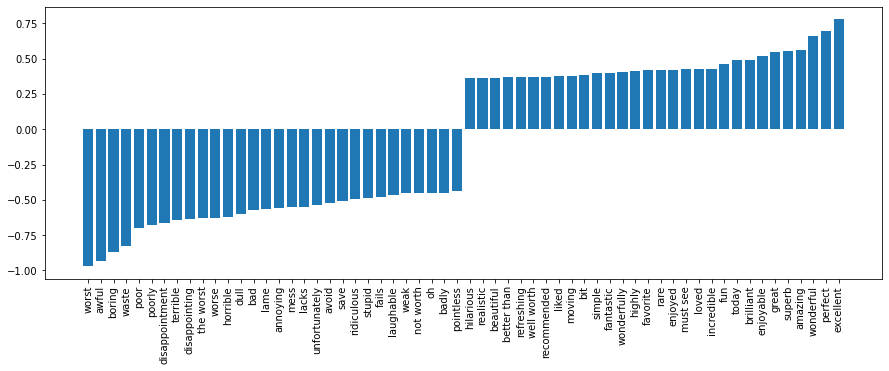

In [55]:
plt.figure(figsize=(15,5))  # 가로, 세로 비율
plt.bar(top30_df[0], top30_df['coef'])  # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # 축 눈금 각도 조절
plt.show()